<a href="https://colab.research.google.com/github/GulsahDurmaz/redi_fall2024_data_circle_twitter_project/blob/main/Data_Circle_US_Election_2020_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Set

### Context

The 2020 US election is set for **November 3, 2020**, and its global impact will be significant, regardless of the winner. After reading two relevant papers ([linked here](#) and [here](#)), I was inspired to conduct my own sentiment analysis.

### Why Twitter?

Social media platforms like Facebook and Twitter have transformed how we interact and share news. As of June 2019, Twitter had over 348M users posting 500M tweets daily, enabling users to influence trends and shape news coverage.

Twitter has become increasingly important in electoral campaigning, with politicians and parties actively using the platform. This rise in political activity on Twitter has attracted researchers' interest, making election prediction based on Twitter data a popular field. Researchers now analyze citizen sentiment to estimate candidate performance in elections.

### Content

Tweets were collected using the Twitter API `statuses_lookup` and `snsscrape` for specific keywords. The original goal was to update the dataset daily to cover the period from **October 15 to November 4, 2020**.

- **Added on November 6, 2020**: As the election events continue, I decided to keep updating the dataset until at least the end of November 6.
- **Added on November 8, 2020**: One final version will include tweets up until the end of November 8.

### Data Source and Acknowledgment

The data and content described here are originally from **MANCH HUI**'s Kaggle profile. This information was adapted from their dataset, and can be found at their [Kaggle profile](https://www.kaggle.com/manchunhui). All credit for the dataset collection and updates goes to them.



You can download the dataset from [this](https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/data) link.

The dataset contains 21 features :

| No  | Column Name          | Description                                              |
|-----|----------------------|----------------------------------------------------------|
| 1   | created_at           | Date and time of tweet creation                          |
| 2   | tweet_id             | Unique ID of the tweet                                   |
| 3   | tweet                | Full tweet text                                          |
| 4   | likes                | Number of likes                                          |
| 5   | retweet_count        | Number of retweets                                       |
| 6   | source               | Utility used to post the tweet                           |
| 7   | user_id              | User ID of tweet creator                                 |
| 8   | user_name            | Username of tweet creator                                |
| 9   | user_screen_name     | Screen name of tweet creator                             |
| 10  | user_description     | Description of self by tweet creator                     |
| 11  | user_join_date       | Join date of tweet creator                               |
| 12  | user_followers_count | Followers count of tweet creator                         |
| 13  | user_location        | Location given on tweet creator's profile                |
| 14  | lat                  | Latitude parsed from user_location                       |
| 15  | long                 | Longitude parsed from user_location                      |
| 16  | city                 | City parsed from user_location                           |
| 17  | country              | Country parsed from user_location                        |
| 18  | state                | State parsed from user_location                          |
| 19  | state_code           | State code parsed from user_location                     |
| 20  | collected_at         | Date and time tweet data was mined from Twitter          |


# Importing Libraries and Dataset

Here we are using:

- **Pandas** – To load the Dataframe
- **Matplotlib** – To visualize the data features i.e. barplot
- **Seaborn** – To see the correlation between features using heatmap
- **NumPy** – To perform numerical operations and efficiently handle arrays.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# map
import pyproj
import shapely
import geopandas as gpd 

AttributeError: partially initialized module 'pyproj' has no attribute 'network' (most likely due to a circular import)

In [50]:
# trump_df = pd.read_csv(r"/content/sample_data/hashtag_donaldtrump.csv",lineterminator='\n')
# biden_df = pd.read_csv(r"/content/sample_data/hashtag_joebiden.csv",lineterminator='\n')
trump_df = pd.read_csv(r"/Users/gulsah/Desktop/REDI/redi_fall2024_data_circle_twitter_project/csv/hashtag_donaldtrump.csv",lineterminator='\n')
biden_df = pd.read_csv(r"/Users/gulsah/Desktop/REDI/redi_fall2024_data_circle_twitter_project/csv/hashtag_joebiden.csv",lineterminator='\n')

In [51]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [52]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

# Data Preprocessing

We categorize the features based on their data type (int, float, object) and calculate the count for each. Finally, we convert the object data type into the appropriate types as needed.

In [53]:
obj_ = (trump_df.dtypes == 'object')

object_cols = list(obj_[obj_].index)

print("Categorical variables:",len(object_cols))

int_ = (trump_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl_ = (trump_df.dtypes == 'float')
fl_cols = list(fl_[fl_].index)
print("Float variables:",len(fl_cols))

Categorical variables: 14
Integer variables: 0
Float variables: 7


In [54]:
obj_ = (biden_df.dtypes == 'object')

object_cols = list(obj_[obj_].index)

print("Categorical variables:",len(object_cols))

int_ = (biden_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl_ = (biden_df.dtypes == 'float')
fl_cols = list(fl_[fl_].index)
print("Float variables:",len(fl_cols))

Categorical variables: 14
Integer variables: 0
Float variables: 7


In [55]:
# Converting date values (data type: object) to datetime format
trump_df['created_at'] = pd.to_datetime(trump_df['created_at'])
biden_df['created_at'] = pd.to_datetime(biden_df['created_at'])

In [56]:
# drop non necesssary columns
new_trump_df = trump_df.drop(columns= ['tweet_id', 'lat', 'long', 'continent'])
new_trump_df.shape

(970919, 17)

In [57]:
# drop non necesssary columns
new_biden_df = biden_df.drop(columns= ['tweet_id', 'lat', 'long', 'continent'])
new_biden_df.shape

(776886, 17)

# Exploratory Data Analysis - Global

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all variables.


<function matplotlib.pyplot.show(close=None, block=None)>

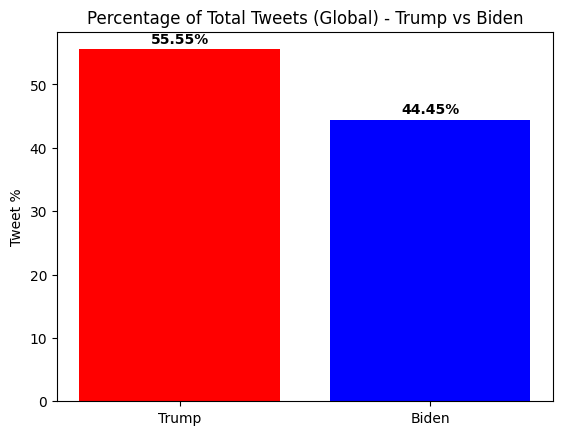

In [58]:
# Percentage of Total Tweets - Trump vs Biden
trump_tweet_count = new_trump_df.shape[0]
biden_tweet_count = new_biden_df.shape[0]

total_tweet_count = trump_tweet_count + biden_tweet_count
trump_tweet_percentage = (trump_tweet_count / total_tweet_count) * 100
biden_tweet_percentage = (biden_tweet_count / total_tweet_count) * 100

tweet_percentage = {'Trump': trump_tweet_percentage, 'Biden': biden_tweet_percentage}

labels = list(tweet_percentage.keys())
values = list(tweet_percentage.values())

plt.bar(labels, values, color=['red', 'blue'])
plt.ylabel('Tweet %')
plt.title('Percentage of Total Tweets (Global) - Trump vs Biden')

for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show

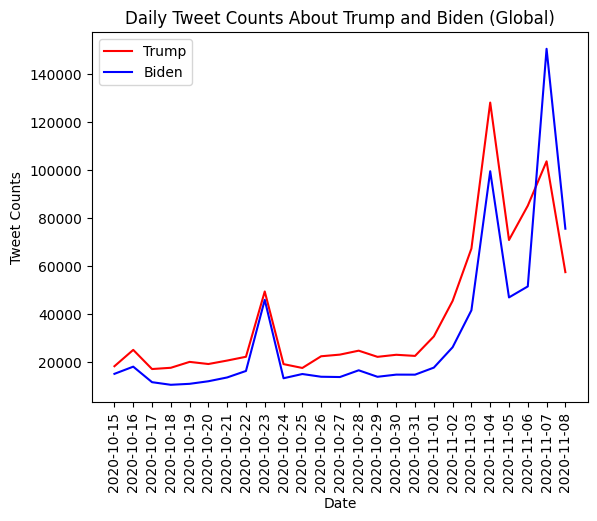

<Figure size 1400x700 with 0 Axes>

In [59]:
# Daily Tweet Counts About Trump and Biden
t_tweets_per_day = new_trump_df.groupby(trump_df['created_at'].dt.date).size()
b_tweets_per_day = new_biden_df.groupby(biden_df['created_at'].dt.date).size()

plt.plot(t_tweets_per_day.index, t_tweets_per_day.values, label='Trump', color='Red')
plt.plot(b_tweets_per_day.index, b_tweets_per_day.values, label='Biden', color='Blue')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Daily Tweet Counts About Trump and Biden (Global)')
plt.legend()
plt.gca().set_xticks(t_tweets_per_day.index)
plt.gca().set_xticklabels(t_tweets_per_day.index, rotation=90)
plt.figure(figsize=(14,7))
plt.show()

# Data Cleaning

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the analysis. So, we can drop them. There are 2 approaches to dealing with empty/null values

- We can easily delete the column/row (if the feature or record is not much important).
- Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
- As Id Column will not be participating in any prediction. So we can Drop it.

In [60]:
# Missing values
percentage_empty_cell_trump = ((new_trump_df.isnull().sum() / trump_tweet_count)*100).round(2)
print("Trump\n", percentage_empty_cell_trump)

percentage_empty_cell_biden = ((new_biden_df.isnull().sum() / biden_tweet_count)*100).round(2)
print("Biden\n", percentage_empty_cell_biden)

# Outliers

# Duplicates

# Erroneous data

# Inconsistencies

Trump
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.09
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description        10.43
user_join_date           0.00
user_followers_count     0.00
user_location           30.38
city                    76.60
country                 54.40
state                   66.98
state_code              69.06
collected_at             0.00
dtype: float64
Biden
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.09
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description        10.56
user_join_date           0.00
user_followers_count     0.00
user_location           30.09
city                    75.95
country                 54.46
state                   66.51
state_code 

In [61]:
# check duplicates

new_trump_df['country'].unique()

array(['United States of America', nan, 'United Kingdom', 'Germany',
       'United States', 'Australia', 'Costa Rica', 'Barbados', 'Cameroon',
       'The Netherlands', 'Mexico', 'Canada', 'France', 'Peru',
       'Argentina', 'South Korea', 'Finland', 'Mongolia', 'India',
       'Japan', 'Turkey', 'Switzerland', 'Iran', 'Portugal', 'Ireland',
       'Russia', 'Greece', 'Egypt', 'Ecuador', 'Colombia', 'Sri Lanka',
       'Italy', 'China', 'Malaysia', 'Indonesia', 'Venezuela', 'Thailand',
       'Sweden', 'Nepal', 'Bangladesh', 'Philippines',
       'Dominican Republic', 'New Zealand', 'Chile', 'Honduras',
       'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Netherlands', 'Saudi Arabia', 'Norway', 'Singapore', 'Cuba',
       'Niger', 'Hungary', 'Greenland', 'United Arab Emirates', 'Brazil',
       'Uganda', 'Guatemala', 'Pakistan', 'Taiwan', 'Qatar',
       'Afghanistan', 'South Africa', 'Nigeria', 'Slovakia', 'Guyana',
       'Kenya', 'Iraq', 'Denmark', 'Uruguay', 'Be

In [62]:
# 'United States of America', 'United States', 'nan'
# combine 'United States of America' and 'United States'

country_mapping = {
    'United States of America': 'USA',
    'United States': 'USA'
}
new_trump_df['country'] = new_trump_df['country'].replace(country_mapping)
new_biden_df['country'] = new_biden_df['country'].replace(country_mapping)
new_trump_df['country'].unique()

array(['USA', nan, 'United Kingdom', 'Germany', 'Australia', 'Costa Rica',
       'Barbados', 'Cameroon', 'The Netherlands', 'Mexico', 'Canada',
       'France', 'Peru', 'Argentina', 'South Korea', 'Finland',
       'Mongolia', 'India', 'Japan', 'Turkey', 'Switzerland', 'Iran',
       'Portugal', 'Ireland', 'Russia', 'Greece', 'Egypt', 'Ecuador',
       'Colombia', 'Sri Lanka', 'Italy', 'China', 'Malaysia', 'Indonesia',
       'Venezuela', 'Thailand', 'Sweden', 'Nepal', 'Bangladesh',
       'Philippines', 'Dominican Republic', 'New Zealand', 'Chile',
       'Honduras', 'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Netherlands', 'Saudi Arabia', 'Norway', 'Singapore', 'Cuba',
       'Niger', 'Hungary', 'Greenland', 'United Arab Emirates', 'Brazil',
       'Uganda', 'Guatemala', 'Pakistan', 'Taiwan', 'Qatar',
       'Afghanistan', 'South Africa', 'Nigeria', 'Slovakia', 'Guyana',
       'Kenya', 'Iraq', 'Denmark', 'Uruguay', 'Belgium', 'Lebanon',
       'Austria', 'Liechte

In [63]:
trump_usa_count = new_trump_df[new_trump_df['country'] == 'USA'].shape[0]
print(f"Number of tweets from USA: {trump_usa_count}")

trump_usa_percentage = (trump_usa_count / total_tweet_count) * 100
trump_usa_percentage = np.round(trump_usa_percentage, 2)
print(f"Percentage of tweets USA/total: {trump_usa_percentage}")

Number of tweets from USA: 213263
Percentage of tweets USA/total: 12.2


In [64]:
biden_usa_count = new_biden_df[new_biden_df['country'] == 'USA'].shape[0]
print(f"Number of tweets from USA: {biden_usa_count}")

biden_usa_percentage = (biden_usa_count / total_tweet_count) * 100
biden_usa_percentage = np.round(biden_usa_percentage, 2)
print(f"Percentage of tweets USA/total: {biden_usa_percentage}")

Number of tweets from USA: 181137
Percentage of tweets USA/total: 10.36


# Exploratory Data Analysis - Only USA Users

In [65]:
# Create a new DataFrame with only USA data
usa_trump_df = new_trump_df[new_trump_df['country'] == 'USA']
usa_trump_df.shape

(213263, 17)

In [66]:
usa_biden_df = new_biden_df[new_biden_df['country'] == 'USA']
usa_biden_df.shape

(181137, 17)

<function matplotlib.pyplot.show(close=None, block=None)>

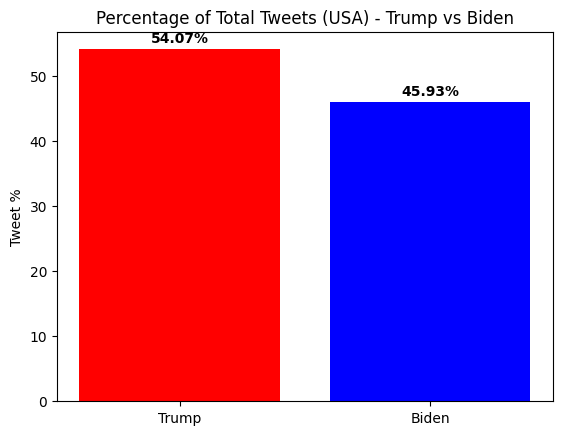

In [67]:
# Percentage of Total Tweets (USA) - Trump vs Biden
trump_tweet_count_usa = usa_trump_df.shape[0]
biden_tweet_count_usa = usa_biden_df.shape[0]

total_tweet_count_usa = trump_tweet_count_usa + biden_tweet_count_usa
trump_tweet_percentage_usa = (trump_tweet_count_usa / total_tweet_count_usa) * 100
biden_tweet_percentage_usa = (biden_tweet_count_usa / total_tweet_count_usa) * 100

tweet_percentage_usa = {'Trump': trump_tweet_percentage_usa, 'Biden': biden_tweet_percentage_usa}

labels = list(tweet_percentage_usa.keys())
values = list(tweet_percentage_usa.values())

plt.bar(labels, values, color=['red', 'blue'])
plt.ylabel('Tweet %')
plt.title('Percentage of Total Tweets (USA) - Trump vs Biden')

for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show

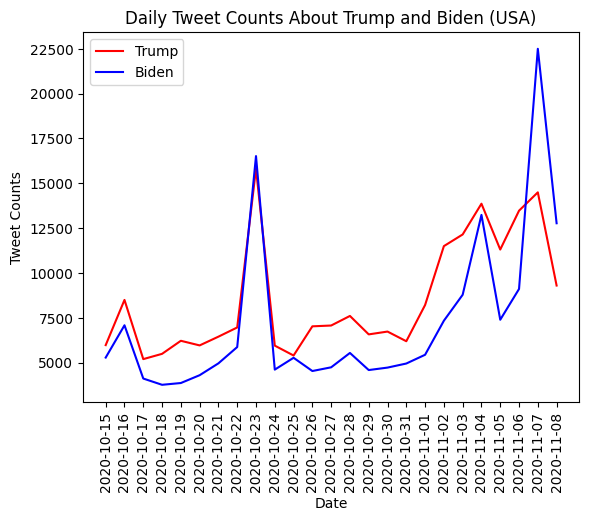

<Figure size 1400x700 with 0 Axes>

In [68]:
# Daily Tweet Counts About Trump and Biden
t_tweets_per_day = usa_trump_df.groupby(usa_trump_df['created_at'].dt.date).size()
b_tweets_per_day = usa_biden_df.groupby(usa_biden_df['created_at'].dt.date).size()

plt.plot(t_tweets_per_day.index, t_tweets_per_day.values, label='Trump', color='Red')
plt.plot(b_tweets_per_day.index, b_tweets_per_day.values, label='Biden', color='Blue')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Daily Tweet Counts About Trump and Biden (USA)')
plt.legend()
plt.gca().set_xticks(t_tweets_per_day.index)
plt.gca().set_xticklabels(t_tweets_per_day.index, rotation=90)
plt.figure(figsize=(14,7))
plt.show()

/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_87235/2968988051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_trump_df.loc[:, 'tweet_hour'] = usa_trump_df['created_at'].dt.hour
/var/folders/0m/wtx537hs0p18qyy9nvg99f300000gn/T/ipykernel_87235/2968988051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_biden_df.loc[:, 'tweet_hour'] = usa_biden_df['created_at'].dt.hour


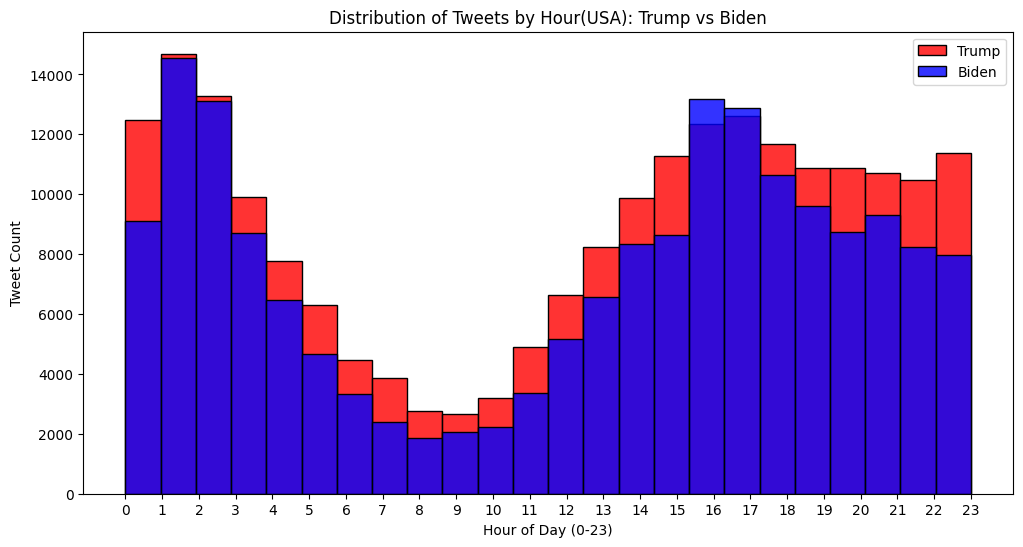

In [69]:
# Expl 2: Investigate Distribution of Hour of Tweets
usa_trump_df.loc[:, 'tweet_hour'] = usa_trump_df['created_at'].dt.hour
usa_biden_df.loc[:, 'tweet_hour'] = usa_biden_df['created_at'].dt.hour

plt.figure(figsize=(12,6))

sns.histplot(usa_trump_df['tweet_hour'], bins=24, kde=False, color='red', label='Trump', alpha=0.8)
sns.histplot(usa_biden_df['tweet_hour'], bins=24, kde=False, color='blue', label='Biden', alpha=0.8)

plt.title('Distribution of Tweets by Hour(USA): Trump vs Biden')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tweet Count')
plt.xticks(range(0, 24))  # Show all hours on the x-axis
plt.legend()  # Show the legend to distinguish Trump and Biden
plt.grid(False)

plt.show()

In [70]:
# Missing values
percentage_empty_cell_trump_usa = ((usa_trump_df.isnull().sum() / trump_tweet_count_usa)*100).round(2)
print("Trump\n", percentage_empty_cell_trump_usa)

percentage_empty_cell_biden_usa = ((usa_biden_df.isnull().sum() / biden_tweet_count_usa)*100).round(2)
print("Biden\n", percentage_empty_cell_biden_usa)

Trump
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.01
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description         5.84
user_join_date           0.00
user_followers_count     0.00
user_location            0.00
city                    52.19
country                  0.00
state                   16.12
state_code              16.12
collected_at             0.00
tweet_hour               0.00
dtype: float64
Biden
 created_at               0.00
tweet                    0.00
likes                    0.00
retweet_count            0.00
source                   0.00
user_id                  0.00
user_name                0.00
user_screen_name         0.00
user_description         6.17
user_join_date           0.00
user_followers_count     0.00
user_location            0.00
city                    49.96
country                  0.00
state      

In [88]:
# Trump - tweet counts according to states
usa_trump_grouped = usa_trump_df.groupby('state')['tweet'].count()
usa_trump_grouped.shape

(53,)

In [89]:
# Biden - tweet counts according to states
usa_biden_grouped = usa_biden_df.groupby('state')['tweet'].count()
usa_biden_grouped.shape

(54,)

In [102]:
usa_combined_df = pd.merge(usa_trump_grouped, usa_biden_grouped, on='state', how='outer')
usa_combined_df = usa_combined_df.rename(columns={'tweet_x': 'trump_tweets', 'tweet_y': 'biden_tweets'})
# NaN fill with  0
usa_combined_df.fillna(0, inplace=True)

usa_combined_df.astype(int)

,trump_tweets,biden_tweets
state,,
Alabama,849,864
Alaska,311,429
Arizona,2865,3248
Arkansas,613,469
California,31149,25817
Colorado,3618,2687
Connecticut,1141,878
Delaware,245,331
District of Columbia,9684,7055


In [116]:
# Load the US states shapefile (replace with your actual path)
usa_map = gpd.read_file('/Users/gulsah/Desktop/REDI/redi_fall2024_data_circle_twitter_project/ne_110m_admin_1_states_provinces_lines/ne_110m_admin_1_states_provinces_lines.shp')

# Check the first few rows to confirm it loaded correctly
print(usa_map.head())

# Filter to include only the USA
usa_map = usa_map[usa_map['adm0_a3'] == 'USA']


AttributeError: partially initialized module 'pyproj' has no attribute 'network' (most likely due to a circular import)

In [27]:
# Expl 4: Investigate The Most Retweeted Tweets - Trump
usa_trump_df_retweet = usa_trump_df.sort_values(by='retweet_count', ascending=False)
usa_trump_df_retweet.head(5)

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,city,country,state,collected_at
786530,2020-11-06 16:31:06,America Assembled!🇺🇸🎉\n\n@JoeBiden @KamalaHarr...,74084.0,20491.0,Twitter for iPhone,38362690.0,John Handem Piette,JohnHPiette,"Director, Editor, Actor living the dream in Lo...",2009-05-07 03:55:16,8033.0,"Brooklyn, NY",New York,USA,New York,2020-11-07 11:20:11.759392
746692,2020-11-06 05:13:42,LOOKS LIKE VOTER FRAUD TO ME!\n\n#ElectionResu...,19862.0,9572.0,Twitter for iPhone,47293791.0,Terrence K. Williams,w_terrence,Actor• Comedian• My New Book “ From The Foster...,2009-06-15 08:46:13,1197194.0,United States,NaN,USA,NaN,2020-11-07 11:33:50.050458
548591,2020-11-04 04:12:07,How did they call California for Joe Biden 8 m...,35449.0,6629.0,Twitter for iPhone,47293791.0,Terrence K. Williams,w_terrence,Actor• Comedian• My New Book “ From The Foster...,2009-06-15 08:46:13,1190959.0,United States,NaN,USA,NaN,2020-11-05 12:16:23.532171
245075,2020-10-26 00:08:24,The White House still has not released a healt...,25987.0,5986.0,Twitter for iPhone,212674482.0,Paula Reid,PaulaReidCBS,@CBSNews White House Correspondent. Lawyer. re...,2010-11-06 18:45:01,318675.0,Washington DC,Washington,USA,District of Columbia,2020-10-27 17:38:26.623985
21248,2020-10-16 01:24:00,"Why can’t @NBCNews choose a professional, seas...",14420.0,5324.0,Twitter for iPad,633966700.0,Alana Stewart,AlanaKStewart,"Actress, Filmmaker, NY Times Best-Selling Auth...",2012-07-12 18:57:57,41105.0,"Beverly Hills, California",NaN,USA,California,2020-10-21 02:14:32.673552166


In [63]:
# Expl 4: Investigate The Most Retweeted Tweets - Biden
usa_biden_df_retweet = usa_biden_df.sort_values(by='retweet_count', ascending=False)
usa_biden_df_retweet.head(5)

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,city,country,state,collected_at,tweet_hour
536374,2020-11-06 16:31:06,America Assembled!🇺🇸🎉\n\n@JoeBiden @KamalaHarr...,74528.0,20615.0,Twitter for iPhone,38362690.0,John Handem Piette,JohnHPiette,"Director, Editor, Actor living the dream in Lo...",2009-05-07 03:55:16,8080.0,"Brooklyn, NY",New York,USA,New York,2020-11-07 11:40:57.159884,16
20432,2020-10-16 03:17:29,Tonight a woman in the audience of Trump's tow...,165702.0,17652.0,Twitter Web App,139823781.0,bettemidler,BetteMidler,Kindness is the language which the deaf can he...,2010-05-03 20:00:36,2028360.0,"New York, NY",New York,USA,New York,2020-10-21 02:59:56.181023787,3
196612,2020-10-27 03:16:27,"Are you there, God? It's me, Bette. I'm so sca...",59403.0,7489.0,Twitter Web App,139823781.0,bettemidler,BetteMidler,“It is wrong for a man to say he is certain of...,2010-05-03 20:00:36,2030864.0,"New York, NY",New York,USA,New York,2020-10-28 14:26:55.372958,3
281536,2020-11-01 20:41:36,"Are you there, God? It's me again, Bette. We'r...",45540.0,6133.0,Twitter Web App,139823781.0,bettemidler,BetteMidler,“The great tragedy of science - the slaying of...,2010-05-03 20:00:36,2033999.0,"New York, NY",New York,USA,New York,2020-11-02 16:55:48.022888,20
16735,2020-10-16 01:04:10,OMG! #JoeBiden speaks like a human being! An...,43399.0,6038.0,Twitter for iPhone,139823781.0,bettemidler,BetteMidler,Kindness is the language which the deaf can he...,2010-05-03 20:00:36,2028360.0,"New York, NY",New York,USA,New York,2020-10-21 02:27:33.810885161,1


In [64]:
# Expl 6: Investigate The Most Liked Tweets - Trump
usa_trump_df_like = usa_trump_df.sort_values(by='likes', ascending=False)
usa_trump_df_like.head(5)

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,city,country,state,collected_at,tweet_hour
786530,2020-11-06 16:31:06,America Assembled!🇺🇸🎉\n\n@JoeBiden @KamalaHarr...,74084.0,20491.0,Twitter for iPhone,38362690.0,John Handem Piette,JohnHPiette,"Director, Editor, Actor living the dream in Lo...",2009-05-07 03:55:16,8033.0,"Brooklyn, NY",New York,USA,New York,2020-11-07 11:20:11.759392,16
548591,2020-11-04 04:12:07,How did they call California for Joe Biden 8 m...,35449.0,6629.0,Twitter for iPhone,47293791.0,Terrence K. Williams,w_terrence,Actor• Comedian• My New Book “ From The Foster...,2009-06-15 08:46:13,1190959.0,United States,NaN,USA,NaN,2020-11-05 12:16:23.532171,4
245075,2020-10-26 00:08:24,The White House still has not released a healt...,25987.0,5986.0,Twitter for iPhone,212674482.0,Paula Reid,PaulaReidCBS,@CBSNews White House Correspondent. Lawyer. re...,2010-11-06 18:45:01,318675.0,Washington DC,Washington,USA,District of Columbia,2020-10-27 17:38:26.623985,0
818751,2020-11-07 04:36:44,#trump wants to throw out military ballots? W...,23225.0,1851.0,Twitter for iPhone,139823781.0,bettemidler,BetteMidler,It’s today!,2010-05-03 20:00:36,2042681.0,"New York, NY",New York,USA,New York,2020-11-08 10:59:25.539439,4
544652,2020-11-04 03:33:23,Blacks for Trump 2020 \n\nWe showed up for him...,23037.0,2652.0,Twitter for iPhone,47293791.0,Terrence K. Williams,w_terrence,Actor• Comedian• My New Book “ From The Foster...,2009-06-15 08:46:13,1190960.0,United States,NaN,USA,NaN,2020-11-05 12:17:12.559484,3


In [65]:
# Expl 6: Investigate The Most Liked Tweets - Biden
usa_biden_df_like = usa_biden_df.sort_values(by='likes', ascending=False)
usa_biden_df_like.head(5)

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,city,country,state,collected_at,tweet_hour
20432,2020-10-16 03:17:29,Tonight a woman in the audience of Trump's tow...,165702.0,17652.0,Twitter Web App,139823781.0,bettemidler,BetteMidler,Kindness is the language which the deaf can he...,2010-05-03 20:00:36,2028360.0,"New York, NY",New York,USA,New York,2020-10-21 02:59:56.181023787,3
536374,2020-11-06 16:31:06,America Assembled!🇺🇸🎉\n\n@JoeBiden @KamalaHarr...,74528.0,20615.0,Twitter for iPhone,38362690.0,John Handem Piette,JohnHPiette,"Director, Editor, Actor living the dream in Lo...",2009-05-07 03:55:16,8080.0,"Brooklyn, NY",New York,USA,New York,2020-11-07 11:40:57.159884,16
196612,2020-10-27 03:16:27,"Are you there, God? It's me, Bette. I'm so sca...",59403.0,7489.0,Twitter Web App,139823781.0,bettemidler,BetteMidler,“It is wrong for a man to say he is certain of...,2010-05-03 20:00:36,2030864.0,"New York, NY",New York,USA,New York,2020-10-28 14:26:55.372958,3
713542,2020-11-08 03:25:28,Wonderful speeches tonight by President and Vi...,59345.0,2838.0,Twitter for iPhone,139823781.0,bettemidler,BetteMidler,"""It is curious that physical courage should be...",2010-05-03 20:00:36,2043747.0,"New York, NY",New York,USA,New York,2020-11-09 18:30:31.505110,3
281536,2020-11-01 20:41:36,"Are you there, God? It's me again, Bette. We'r...",45540.0,6133.0,Twitter Web App,139823781.0,bettemidler,BetteMidler,“The great tragedy of science - the slaying of...,2010-05-03 20:00:36,2033999.0,"New York, NY",New York,USA,New York,2020-11-02 16:55:48.022888,20
